In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Rename 'processed_merged_new_df' to 'processed_df'.

In [2]:
processed_df = pd.read_csv('D:/Project_Restaurant_Chain/Full/merged_dataset.csv')

In [3]:
processed_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
processed_df

,total_covers,total_gross_sales,total_tip,total_discount,total_cost,total_stock_cost,total_seats,total_inside_seats,ground_seats,1st_floor_seats,...,Area_Wales,Area_West Midlands,Area_Yorkshire & Humberside,rating_A,rating_B,rating_C,rating_D,rating_E,rating_F,check_time_difference_in_seconds
0,0,18.92,0.00,-90.00,57.41,1.149,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,122
1,0,-15.87,0.00,0.00,15.87,-1.916,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2,0,0.00,0.00,0.00,0.00,1.520,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,3.69,0.00,0.00,-3.69,0.214,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,12
4,0,4.99,0.00,0.00,-4.99,1.722,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0,5.18,0.00,0.00,-5.18,0.934,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,35
6,0,5.18,0.00,0.00,-5.18,0.741,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,0
7,0,4.29,0.00,0.00,-4.29,0.667,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,0
8,0,0.00,0.00,0.00,0.00,0.000,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,42
9,0,0.00,0.00,0.00,0.00,0.667,204.0,144.0,128.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
processed_df.columns

Index(['total_covers', 'total_gross_sales', 'total_tip', 'total_discount',
       'total_cost', 'total_stock_cost', 'total_seats', 'total_inside_seats',
       'ground_seats', '1st_floor_seats', 'bar_seats', 'outside_seats',
       'private_dining_covers', 'Area_East England', 'Area_East Midlands',
       'Area_Greater London', 'Area_Home Counties', 'Area_Ireland',
       'Area_North East', 'Area_North West', 'Area_Northern Ireland',
       'Area_Scotland', 'Area_South East', 'Area_South West', 'Area_Wales',
       'Area_West Midlands', 'Area_Yorkshire & Humberside', 'rating_A',
       'rating_B', 'rating_C', 'rating_D', 'rating_E', 'rating_F',
       'check_time_difference_in_seconds'],
      dtype='object')

In [6]:
features =['total_gross_sales', 'total_tip', 'total_discount',\
       'total_cost', 'total_stock_cost', 'total_seats', 'total_inside_seats',\
       'ground_seats', '1st_floor_seats', 'bar_seats', 'outside_seats',\
       'private_dining_covers', 'Area_East England', 'Area_East Midlands',\
       'Area_Greater London', 'Area_Home Counties', 'Area_Ireland',\
       'Area_North East', 'Area_North West', 'Area_Northern Ireland',\
       'Area_Scotland', 'Area_South East', 'Area_South West', 'Area_Wales',\
       'Area_West Midlands', 'Area_Yorkshire & Humberside', 'rating_A',\
       'rating_B', 'rating_C', 'rating_D', 'rating_E', 'rating_F',\
       'check_time_difference_in_seconds']

In [7]:
columns = ['total_covers', 'total_gross_sales', 'total_tip', 'total_discount',\
       'total_cost', 'total_stock_cost', 'total_seats', 'total_inside_seats',\
       'ground_seats', '1st_floor_seats', 'bar_seats', 'outside_seats',\
       'private_dining_covers', 'Area_East England', 'Area_East Midlands',\
       'Area_Greater London', 'Area_Home Counties', 'Area_Ireland',\
       'Area_North East', 'Area_North West', 'Area_Northern Ireland',\
       'Area_Scotland', 'Area_South East', 'Area_South West', 'Area_Wales',\
       'Area_West Midlands', 'Area_Yorkshire & Humberside', 'rating_A',\
       'rating_B', 'rating_C', 'rating_D', 'rating_E', 'rating_F',\
       'check_time_difference_in_seconds']

In [8]:
len(features)

33

Now the number of features has been dramatically reduced.

In [9]:
import seaborn as sns

### Pearson and Spearman coefficient matrices

Here I will use the the Pearson coefficient to show the top 10 features that correlate with 'total_covers'.

#### Pearson cof

In [10]:
#correlation matrix
corrmat_p = processed_df[columns].corr(method='pearson', min_periods=1)

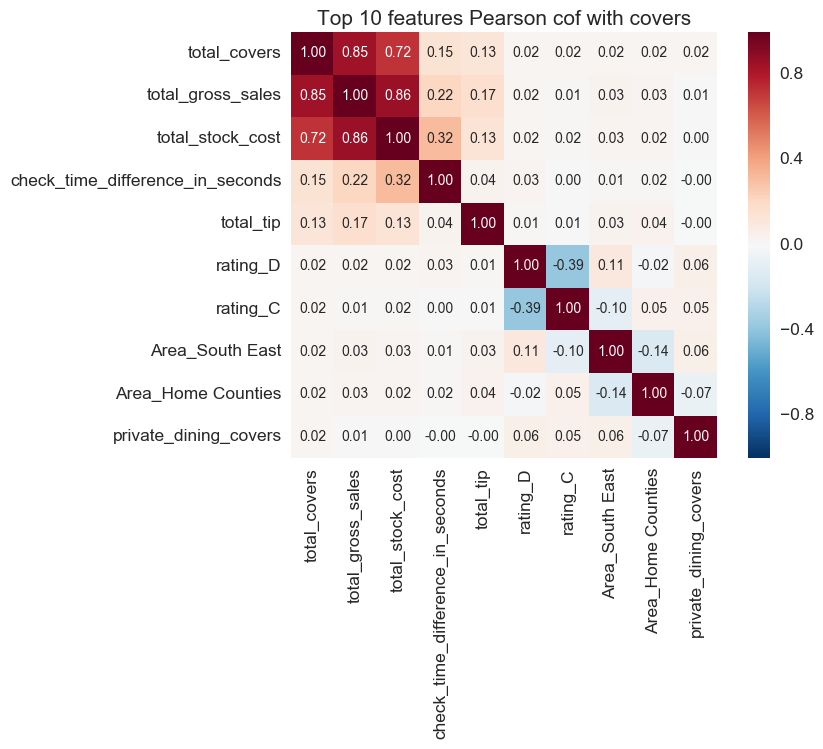

In [11]:
# Pearson cof
k = 10 #number of variables for heatmap
cols = corrmat_p.nlargest(k, 'total_covers')['total_covers'].index
cm = processed_df[cols].corr(method='pearson',min_periods=1)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 10}, \
                 yticklabels=cols.values, \
                 xticklabels=cols.values)
plt.title('Top 10 features Pearson cof with covers')
plt.show()

Very surprisingly, we can see some of the features are heavily correlated. For example, ‘total_gross_sales' is correlated with 'total_covers' with a coefficient of 0.85, and 'total_stock_cost' of 0.72, the newly created feature 'check_time_difference_in_seconds' is also very correlated with a coefficient of 0.15. ‘total_gross_sales' and 'total_stock_cost' are also very correlated, with a value of 0.86.

In [12]:
corrmat_lp = processed_df[columns].corr(method='pearson', min_periods=1)

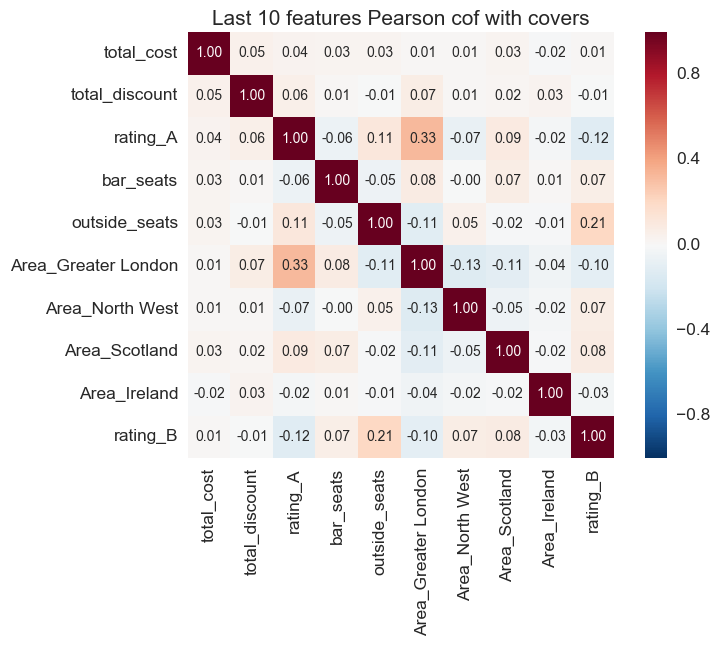

In [13]:
k = 10 #number of variables for heatmap
cols = corrmat_lp.nsmallest(k, 'total_covers')['total_covers'].index
cm = processed_df[cols].corr(method='pearson',min_periods=1)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
                 yticklabels=cols.values, \
                 xticklabels=cols.values)
plt.title('Last 10 features Pearson cof with covers')
plt.show()

The last 10 features have very low coefficient values with 'total_covers', say less than 0.005 maybe. Basically ignorable.

#### Spearman cof

In [14]:
#correlation matrix
corrmat_s = processed_df[columns].corr(method='spearman', min_periods=1)

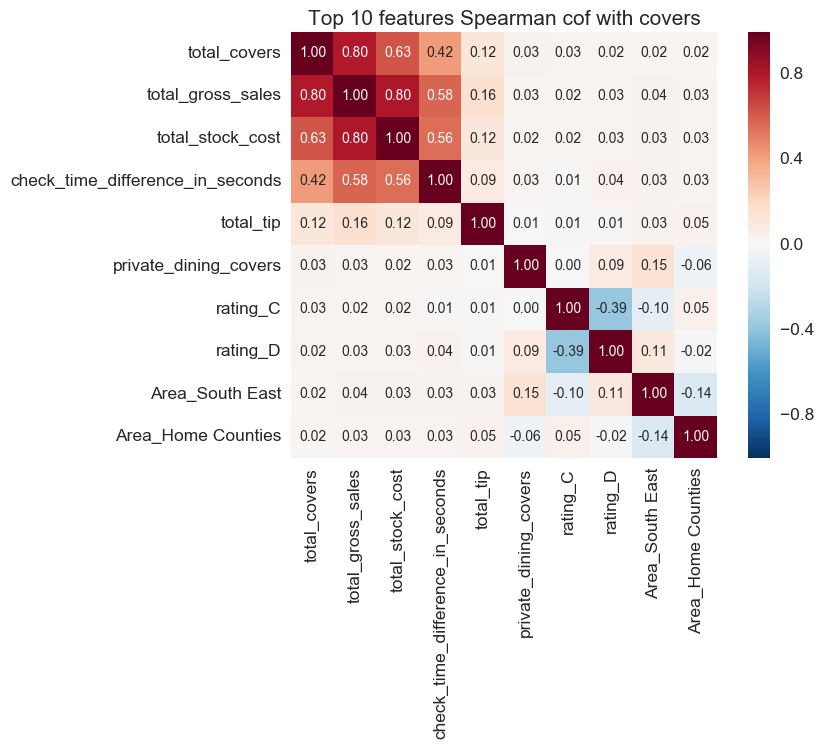

In [15]:
# Pearson cof
k = 10 #number of variables for heatmap
cols = corrmat_s.nlargest(k, 'total_covers')['total_covers'].index
cm = processed_df[cols].corr(method='spearman',min_periods=1)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,  annot=True, square=True, fmt='.2f',annot_kws={'size': 10}, \
                 yticklabels=cols.values, \
                 xticklabels=cols.values)
plt.title('Top 10 features Spearman cof with covers')
plt.show()

Not so different from the previous one (Pearson).

In [16]:
corrmat_ls = processed_df[columns].corr(method='spearman', min_periods=1)

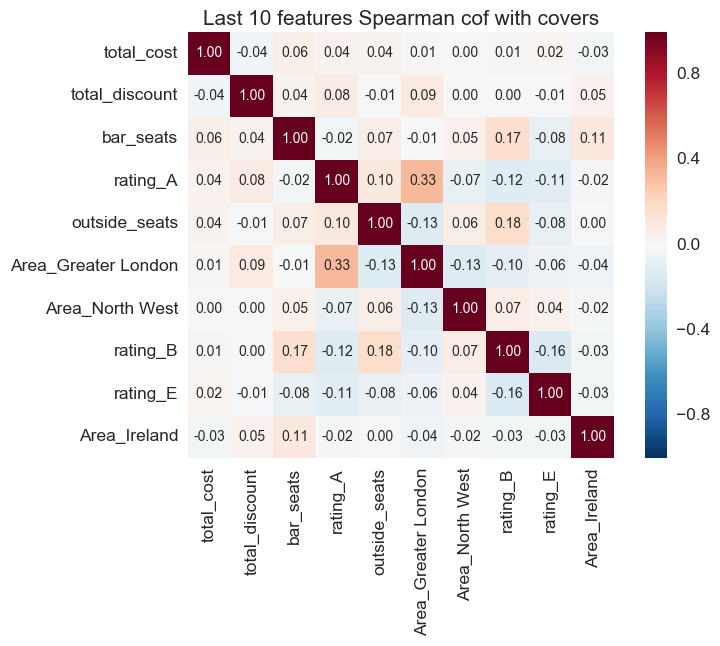

In [17]:
k = 10 #number of variables for heatmap
cols = corrmat_ls.nsmallest(k, 'total_covers')['total_covers'].index
cm = processed_df[cols].corr(method='spearman',min_periods=1)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
                 yticklabels=cols.values, \
                 xticklabels=cols.values)
plt.title('Last 10 features Spearman cof with covers')
plt.show()

Similar to the result of Pearson coefficient.